In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils
import copy

In [2]:
def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    # Zero padd input image
    size_im = len(im)
    temp = np.zeros([2*size_im, 2*size_im])
    for row in range(size_im):
        for col in range(size_im):
            temp[row][col] = im[row][col]
    im = temp
    
    fft_im = np.fft.fftshift(np.fft.fft2(im))
    initial_fft_im = copy.deepcopy(fft_im)
    size_im = len(fft_im)
    
    #fft_length = size_im*np.ones(size_im)
    #fft_kernel = np.fft.fftshift(np.fft.fft2(kernel,fft_length))
    kernel_padded = np.zeros([size_im, size_im])
    kernel_size = len(kernel)
    middle = size_im / 2

    for row in range(kernel_size):
        for col in range(kernel_size):
            kernel_width = (kernel_size-1)/2
            pos_x = int(middle+row-kernel_width)
            pos_y = int(middle+col-kernel_width)
            kernel_padded[pos_x][pos_y] = kernel[row][col]

    fft_kernel = np.fft.fftshift(np.fft.fft2(kernel_padded))

    for row in range(size_im):
        for col in range(size_im):
            fft_im[row][col] *= fft_kernel[row][col]


    conv_result = np.abs(np.fft.fftshift(np.fft.ifft2(fft_im)))[:512,:512]

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray") # Initial image
        
        plt.subplot(1, 5, 2) 
        plt.imshow(np.log1p(np.abs(initial_fft_im)), cmap="gray") # Visualize FFT

        plt.subplot(1, 5, 3)
        plt.imshow(np.log1p(np.abs(fft_kernel)), cmap="gray") # Visualize FFT kernel

        plt.subplot(1, 5, 4)
        plt.imshow(np.log1p(np.abs(fft_im)), cmap="gray") # Visualize filtered FFT image

        plt.subplot(1, 5, 5) 
        plt.imshow(conv_result, cmap="gray") # Visualize filtered spatial image

    ### END YOUR CODE HERE ###
    return conv_result

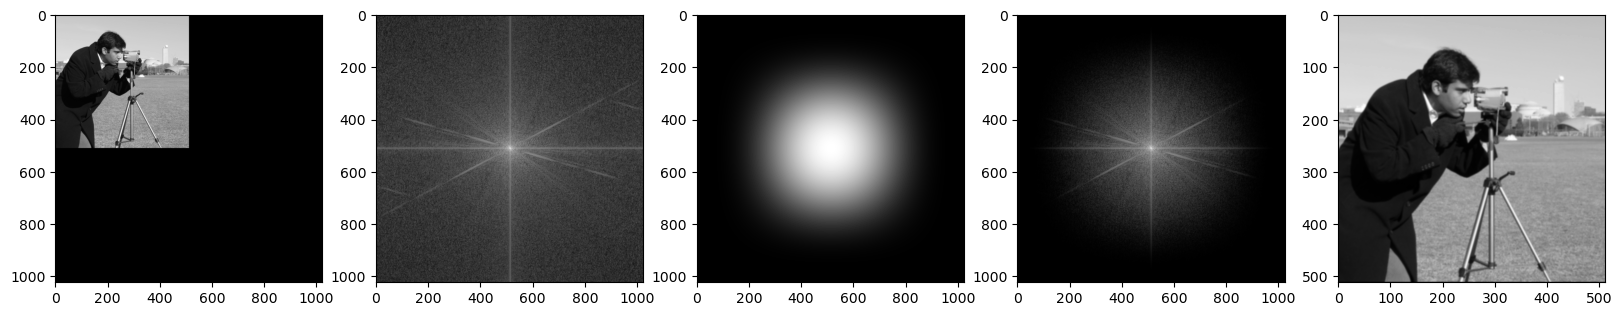

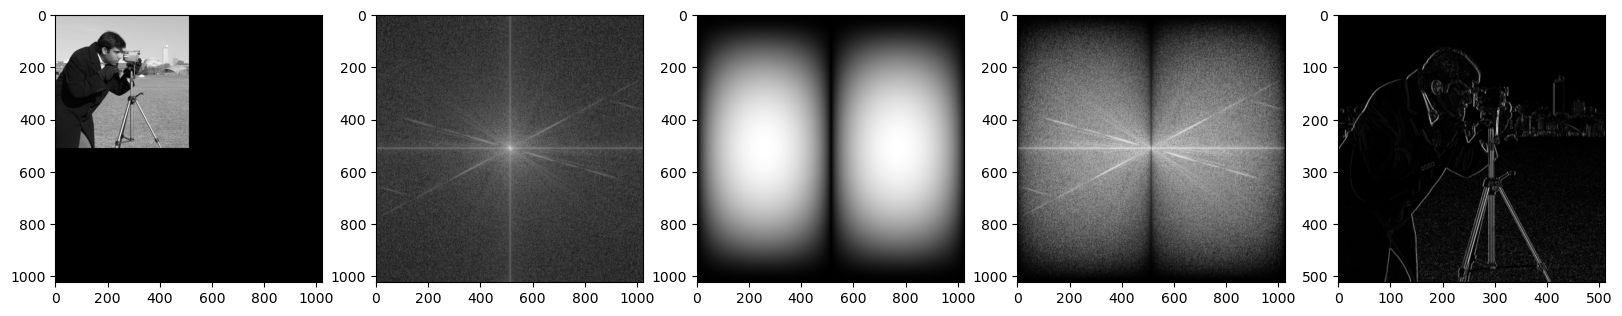

Saving image to: image_processed/camera_gaussian.png
Saving image to: image_processed/camera_sobelx.png


/home/oeljungg/Documents/TDT4195/image-processing/assignment2/utils.py:84: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [3]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)